![header](https://i.imgur.com/I4ake6d.jpg)

# COPERNICUS MARINE PHYSICAL SOUTH AMERICA TRAINING

<div style="text-align: right"><i> 01-PHY-01 </i></div>

*Release date: June 2022*


<center><h1>How to visualize maps of Temperature</h1></center>

<div class="alert alert-block alert-warning">
    <h3>Before starting, read carefully the following execution notes</h3>
    <ul><li>
        Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play">
        </i></button> button from the icons menu above the notebook (otherwise press the keyboard shortcut `Shift` + `Enter`).
        </li>
    <li>
        If for any reason the notebook stops working, from the same menu click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the text menu above the icons one, click on "Cell" and select "Run All Above".
        </li></ul>
</div>

***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. About the data](#2.-About-the-data)
- [3. Download the data](#3.-Download-the-data)
- [4. Install the packages](#4.-Install-the-packages)
- [5. Explore the data](#5.-Explore-the-data) 
<!-- - [4. Conclusion](#4.-Conclusion) -->
***

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

The objective of this exercise is to use the CMEMS GLO-MFC model products to visualize the main physical fields in the Malvinas area.

In particular, you will display:

- horizontal maps of the different 2D and 3D variables, the latter also at different depths for two different months (January 2011 and August 2011) ????? DA TOGLIERE
- vertical sections of temperature along a transect in the Malvinas area highlighting the vertical structure of these fields in two different seasons.

***

# 2. About the data

[Go back to the "Table of contents"](#Table-of-contents)

## Model description

### This example is based on the product: [GLOBAL_REANALYSIS_PHY_001_030](https://resources.marine.copernicus.eu/product-detail/GLOBAL_MULTIYEAR_PHY_001_030/INFORMATION)

The GLORYS12V1 product is the CMEMS global ocean eddy-resolving (1/12° horizontal resolution, 50 vertical levels) reanalysis covering the altimetry (1993 onward).

It is based largely on the current real-time global forecasting CMEMS system. The model component is the NEMO platform driven at surface by ECMWF ERA-Interim then ERA5 reanalyses for recent years. Observations are assimilated by means of a reduced-order Kalman filter. Along track altimeter data (Sea Level Anomaly), Satellite Sea Surface Temperature, Sea Ice Concentration and In situ Temperature and Salinity vertical Profiles are jointly assimilated. Moreover, a 3D-VAR scheme provides a correction for the slowly-evolving large-scale biases in temperature and salinity.

This product includes daily and monthly mean files for temperature, salinity, currents, sea level, mixed layer depth and ice parameters from the top to the bottom. The global ocean output files are displayed on a standard regular grid at 1/12° (approximatively 8 km) and on 50 standard levels.

<img src="./img/GLOBAL_REANALYSIS_PHY_001_030_table1.png">

## Get more info on the product

1. You can find info on this product and access to the download services in the [dedicated Product Page on Copernicus Marine (CMEMS) Web portal](https://resources.marine.copernicus.eu/product-detail/GLOBAL_MULTIYEAR_PHY_001_030/INFORMATION)
<br><br>
2. For **detailed information** about the product, please consult the **document**: [Product User Manual (PUM)](./docs/CMEMS-GLO-PUM-001-030.pdf)
<br><br>
3. For information about **the quality and validation** of the product, please consult the **document**: [Quality Information Document (QUID)](./docs/CMEMS-GLO-QUID-001-030.pdf)

***

# 3. Download the data

[Go back to the "Table of contents"](#Table-of-contents)

## Parameters used for downloading the data


| Parameter | Value |
| :---: | :---|
| **Product** | GLOBAL_MULTIYEAR_PHY_001_030 |
| **Dataset** | cmems_mod_glo_phy_my_0.083_P1M-m |
| **variables** | thetao, mlost, so, uo, vo|
| **Frequency** | monthly |
| **Lat min** | -56 |
| **Lat max** | -36 |
| **Lon min** | -65 |
| **Lon max** | -42 | 
| **Timesteps** | 2011-01, 2011-08, 2015-04, 2015-05 |
| **Depths** | from 0 to 1000 |
| **Service for downloading** | SUBSETTER |
| **Files total dimension** | ~100MB |

## How to download the products?

If you need some help about the different services for downloading the CMEMS products, please check this [tutorial](
https://help-cmems.mercator-ocean.fr/en/articles/4469993-how-to-download-copernicus-marine-data)

<div class="alert alert-block alert-warning">
    <b>Get the CMEMS User credentials</b>
<hr>
The data are already available in this notebook. But if you want to download the data by yourself, please be sure to have by your CMEMS User credentials. Otherwise please get them <a href="http://marine.copernicus.eu/services-portfolio/register-now/" target="_blank">here</a>.

## Install the *motuclient*

Data can be alternatively downloaded with **motuclient**, a multiplatform python script to automate extraction of information from the Marine Copernicus portal. To install motuclient:

```
!pip install motuclient==1.8.4 --no-cache-dir
```

Write the command below:

To get more info on motuclient visit the related [web page](https://help-cmems.mercator-ocean.fr/en/articles/4796533-what-are-the-motu-client-motuclient-and-python-requirements).

## Download the products

Using *motuclient* you'll be able to download data with the following command lines. 

*Consider that there is a different command line for each file that will be downloaded.*

You have to copy each line to another cell for being execute (**NOTE:** don't forget to set username and password!)

<div class="alert alert-block alert-info">
<b>Tip:</b> The same command lines can be used inside in your bash scripts. Of course you need to install the <i>motuclient</i>.
</div>

Set your CMEMS username and password:

In [ ]:
config = {}
config["user"] = "mhoxhaj"
config["pwd"] = "Presaelettrica6"

Utility function:

In [ ]:
def get_motu_cmd(config, variables):
    cmd = list()
    for k,v in config.items():
        cmd.append("--{} '{}'".format(k, str(v)))
    cmd.append(" ".join(["--variable " + v for v in variables]))
    return "python -m motuclient " + " ".join(cmd) 

Basic configuration for download

In [ ]:
OUT_DIR = "./data"
config["out-dir"] = OUT_DIR

Create the OUT_DIR if it doesn't exist:

In [ ]:
import os
if not os.path.exists(OUT_DIR):
    os.makedirs(OUT_DIR) 

Variables:

In [ ]:
variables = ["uo", "vo", "thetao" ]

Dates:

In [ ]:
dates = ["2011-01-16 12:00:00", "2011-08-16 12:00:00", "2015-04-16 00:00:00", "2015-05-16 12:00:00"]

Configuration for the download:

In [ ]:
config.update({
    "service-id": "GLOBAL_MULTIYEAR_PHY_001_030-TDS",
    "product-id": "cmems_mod_glo_phy_my_0.083_P1M-m",
    "motu": "https://my.cmems-du.eu/motu-web/Motu",
    "longitude-min": -65,
    "longitude-max": -42,
    "latitude-min": -56,
    "latitude-max": -36,
    "depth-min": 0,
    "depth-max": 1000,
})

Execute the download of files:

In [ ]:
import subprocess

if not config["user"] == "USERNAME":
    for d in dates:
        config['date-min'] = config['date-max'] = d
        config["out-name"] = d[0:10] + ".nc"
        cmd_line = get_motu_cmd(config, variables)
        print("\n--- Command line for downloading the data for {}: ---\n".format(d))
        print(cmd_line, '\n')
        print("--- Start to download for {}: ---\n".format(d))
        subprocess.run(cmd_line,  shell=True)
else:
    print("Please insert your CMEMS username and password in the cell above if you want to downdload the files")

Check if the file were created... 

In [ ]:
import glob
glob.glob(OUT_DIR + "/*.nc")

***

# 4. Install the packages

[Go back to the "Table of contents"](#Table-of-contents)

## Required modules

The following Python modules are needed for running the exercises:

| Module name | Description |
| :---: | :---|
| **os** | [ Miscellaneous operating system interfaces](https://docs.python.org/3.7/library/os.html) for managing paths, creating directories,... |
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures |

## Modules installation

Install the needed Python modules.

**Requirement: Python version > 3.x**

Check your Python version:

In [ ]:
!python --version

If you are using the standard *Anaconda3* installation, you can install the needed modules executing the following command:

```
conda install xarray netcdf4 dask matplotlib cartopy numpy
```

Write the command in the following cell:

In [ ]:
conda install xarray netcdf4 dask matplotlib cartopy numpy

***

# 5. Explore the data

[Go back to the "Table of contents"](#Table-of-contents)

Create a dataset from the files:

In [ ]:
import xarray as xr
ds = xr.open_mfdataset(glob.glob("./data/*.nc"))

Open the dataset:

In [ ]:
ds

Another way for getting info:

In [ ]:
ds.info

About the coordinates:

In [ ]:
ds.coords

About the variables:

In [ ]:
ds.data_vars

<div class="alert alert-block alert-info">
The dataset is a 3D dataset: it has depth levels!
</div>

Take a look at the time:

In [ ]:
ds.time

Take a look at the depth levels:

In [ ]:
ds.depth

Get info about the "Temperature" 3D field : 

In [ ]:
ds['thetao']

Get info about "Eastward Velocity" 3D field:

In [ ]:
ds['uo']

Get info about  "Northward Velocity" 3D field:

In [ ]:
ds['vo']

# 6. Plot the data

[Go back to the "Table of contents"](#Table-of-contents)

### Import the packages

For avoiding the warning messages during the execution and installation process, at first remove them:

In [1]:
import warnings
warnings.filterwarnings('ignore')

Import the packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# from cartopy import config
import cartopy
import cartopy.crs as ccrs

**getRangeIndexes**: function for getting the indexes of the array *arr* between the *var_min* and *var_max* values:

In [ ]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

### Configure the variables

In [ ]:
## Set the coordinates names used in the netcdf (see: ds.coords)
lon_name = "longitude"
lat_name = "latitude"
time_name = "time"
depth_name = "depth"

Do the same for the variables names (check the ds.data_vars outputs):

In [ ]:
## Set the variable names
tem_name = "thetao"
uo_name = "uo"
vo_name = "vo"

### Configure the plot

Set the limits for the area: choose the min and max values for the coordinates (and comment with the symbol # the unnecessary ones!):  

In [11]:
## Set lat-lon limits - FULL AREA
lat_min, lat_max = ds[lat_name][0], ds[lat_name][-1]
lon_min, lon_max = ds[lon_name][0], ds[lon_name][-1]

# ## Set lat-lon limits - CUSTOM AREA
# lon_min = -50
# lon_max = -42
# lat_min = -46
# lat_max = -36

In [12]:
## Set the lat/lon indexes
lats_idx = getRangeIndexes(ds[lat_name], lat_min, lat_max)
lons_idx = getRangeIndexes(ds[lon_name], lon_min, lon_max)
## Set lons, lats                                               
lons, lats = ds[lon_name][lons_idx], ds[lat_name][lats_idx]

Set the plot configuration for each variable to plot:

In [13]:
## Set the plot configuration for each variable to plot
variables_conf = {
    "thetao":
        { 
          "min_max": [None, None], # Set the variable's min and max values for the plots and the colorbar 
          "unit": "\u2103",        # unit
          "cmap": "rainbow"         # colorbar palette
        },
    "so":
        { 
          "min_max": [None, None], 
          "unit": "psu",
          "cmap": "rainbow"
        },
    "uo":
        { 
          "min_max": [0, 1], 
          "unit": "m/s",
          "cmap": "rainbow"
        },  
}

In [15]:
## Set the labels for the plot
xlabel = 'longitude [deg]'
ylabel = 'latitude [deg]'

In [16]:
# Plot configuration
width_inch = 18
height_inch = 8

# Axes labels
title_size = 14

### Generate the maps

[]

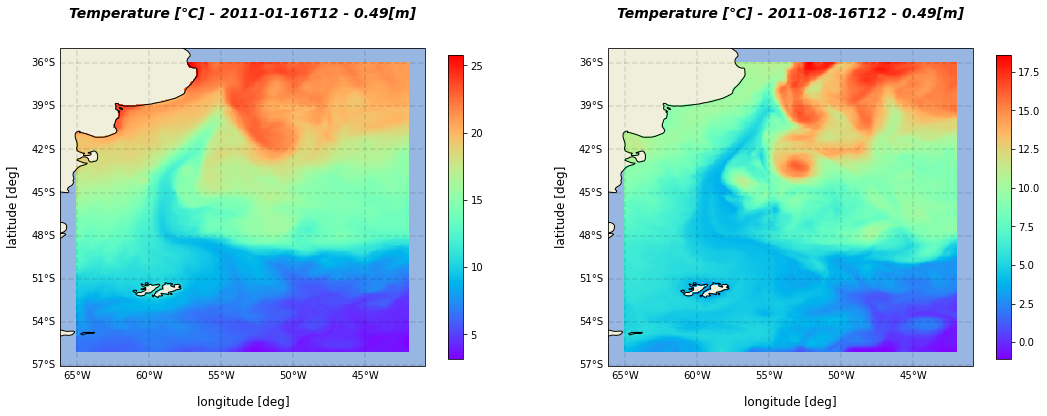

In [18]:
## Set figure
fig = plt.figure(figsize=(width_inch, height_inch))

## Add the plot 1
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())

## ---- Selected values --- #
sel_time = "2011-01-16T12:00" # selected time
sel_depth = 0 # selected depth in [m]
 
## selected var to plot
var_name = "thetao" # temperature
# var_name = "so" # salinity 
#var_name = "mlotst" # mixed layer depth
## ---- Selected values --- #

## Are we considering a 3D variable? 
dataset_3D = True if depth_name in ds[var_name].coords else False

## Prepare the data to plot
data_to_plot = ds[var_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
title = "{var} [{unit}] - {time}".format(time=np.datetime_as_string(data_to_plot.time,'h'), 
                          var=data_to_plot.long_name, 
                          unit=variables_conf[var_name]["unit"])
if (dataset_3D):
    data_to_plot = data_to_plot.sel(depth=sel_depth, method="nearest")
    title += " - {depth:.2f}[m]".format(depth=data_to_plot.depth.data)
                                                                     
## Plot map                                                
pc = plt.pcolormesh(lons, lats, data_to_plot, transform=ccrs.PlateCarree(), cmap=variables_conf[var_name]["cmap"],
                    vmin=variables_conf[var_name]["min_max"][0], vmax=variables_conf[var_name]["min_max"][1])

## Add the colorbar
fig.colorbar(pc, ax=ax, orientation='vertical', shrink=0.70)
# ax.set_global()


## Add features
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


## Add grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True,
                  linewidth=1.5, 
                  color='black', 
                  alpha=0.1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False

## Add labels
ax.set_title(title, fontsize=title_size, fontstyle="italic", fontweight="bold", pad=30)
ax.set_xlabel(xlabel, labelpad=30, fontsize=12)
ax.set_ylabel(ylabel, labelpad=40, fontsize=12)

## calls needed for showing the labels...
ax.set_xticks([])
ax.set_yticks([])

# ----------------------------------------------------------------------------------# 

## Add the plot 2
ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

## ---- Selected values --- #
sel_time = "2011-08-16T12:00" # selected time
sel_depth = 0 # selected depth in [m]

# selected var to plot 
var_name = "thetao" # temperature
# var_name = "so" # salinity 
#var_name = "mlotst" # mixed layer depth
## ---- Selected values --- #

## Are we considering a 3D variable? 
dataset_3D = True if depth_name in ds[var_name].coords else False

## Prepare the data to plot
data_to_plot = ds[var_name].sel(time=sel_time, method="nearest").sel(latitude=lats, longitude=lons) 
title = "{var} [{unit}] - {time}".format(time=np.datetime_as_string(data_to_plot.time,'h'), 
                          var=data_to_plot.long_name, 
                          unit=variables_conf[var_name]["unit"])
if (dataset_3D):
    data_to_plot = data_to_plot.sel(depth=sel_depth, method="nearest")
    title += " - {depth:.2f}[m]".format(depth=data_to_plot.depth.data)


## Plot map
pc = plt.pcolormesh(lons, lats, data_to_plot, transform=ccrs.PlateCarree(), cmap=variables_conf[var_name]["cmap"],
                    vmin=variables_conf[var_name]["min_max"][0], vmax=variables_conf[var_name]["min_max"][1])

## Add the colorbar
fig.colorbar(pc, ax=ax, orientation='vertical', shrink=0.70)

## Add features
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)


## Add grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=True,
                  linewidth=1.5, 
                  color='black', 
                  alpha=0.1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False

## Add labels
ax.set_title(title, fontsize=title_size, fontstyle="italic", fontweight="bold", pad=30)
ax.set_xlabel(xlabel, labelpad=30, fontsize=12)
ax.set_ylabel(ylabel, labelpad=40, fontsize=12)

## calls needed for showing the labels...
ax.set_xticks([])
ax.set_yticks([])

# Conclusion

<div class="alert alert-block alert-success">
    <b>CONGRATULATIONS</b><br>
  
--- 

#### Now you know how to plot the Global physical model provided by Copernicus Marine Service, for free, thanks to the European Commission.

#### To go further, you can try to visualize other variables and diagnostics (spatial or vertical averages, standard deviations...)

#### Hope you have enjoyed this session and let's do great science with our data.

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). 

[Go back to the "Table of contents"](#Table-of-contents)